$$ \LaTeX \text{ command declarations here.}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
$$

In [13]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt;
if "bmh" in plt.style.available: plt.style.use("bmh");

# scientific
import numpy as np;

from scipy import linalg
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# rise config
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'simple',
              'start_slideshow_at': 'selected',
})

{'start_slideshow_at': 'selected', 'theme': 'simple'}

# EECS 545:  Machine Learning
## Lecture 06:  Probability Models and Logistic Regression
* Instructor:  **Jacob Abernethy**
* Date:  January 27, 2016

*Lecture Exposition Credit:*  Benjamin Bray, Saket Dewangan

# Outline

* Locally-Weighted Linear Regression
* Probabilistic Models
    - Generative Models
    - Discriminative Models
* Logistic Regression
    - Intuition, Motivation
    - Newton's Method

# Locally-Weighted Linear Regression

### Locally-Weighted Linear Regression

**Main Idea:**  When predicting $f(x)$, give high weights for *neighbors* of $x$.

<img src="images/locally-weighted-regression.png">

### Regular vs. Locally-Weighted Linear Regression

<img src="images/lwlr-comparison.png">

### Regular vs. Locally-Weighted Linear Regression

**Linear Regression**
<div style="border: 1px solid black; display: block; padding: 15px; margin: 10px 0">
1. Fit $w$ to minimize $\sum_{k} (t_k - w^T \phi(x_k) )^2$
<br>
2. Output $w^T \phi(x_k)$
</div>

**Locally-weighted Linear Regression**
<div style="border: 1px solid black; display: block; padding: 15px; margin: 10px 0">
1. Fit $w$ to minimize $\sum_{k} r_k (t_k - w^T \phi(x_k) )^2$ for some weights $r_k$
<br>
2. Output $w^T \phi(x_k)$
</div>

### Locally-Weighted Linear Regression

- The standard choice for weights $r$ uses the **Gaussian Kernel**, with **kernel width** $\tau$
    $$
    r_k = \exp\left( -\frac{|| x_k - x ||^2}{2\tau^2} \right)
    $$
- Note $r_k$ depends on both $x$ (query point); must solve linear regression for each query point $x$.
- Can be reformulated as a modified version of least squares problem.

### Locally-Weighted Linear Regression

- Choice of kernel width matters.
    - (requires hyperparameter tuning!)

<img src="images/lwlr-kernel-width.png">

> The estimator is minimized when kernel includes as many training points as can be accomodated by the model.  Too large a kernel includes points that degrade the fit; too small a kernel neglects points that increase confidence in the fit.

### Let's back up a little...
# Probabilistic Models & Bayesian Statistics

> *Disclaimer:*  These slides were written by a Bayesian :)

### Probabilistic Models & Bayesian Statistics

Last time, there were several questions about **priors**.

- Represent prior beliefs about acceptable values for model parameters.
- *Example:*  In linear regression, $L_2$ regularization can be interpreted as placing a **Gaussian Prior** on the regression coefficients.

### Probabilistic Models & Bayesian Statistics

All statistical models and machine learning algorithms make assumptions.

- All reasoning is based on implicit assumptions.
- A **Bayesian** will tell you that his prior is a way of explicitly stating those assumptions.

### Probabilistic Models & Bayesian Statistics

This can all get very philosophical, but...

- Bayesian reasoning is best seen as a useful tool.
- Many concepts in machine learning have Bayesian interpretations.
    - Choice of loss / error function, regularization, etc.
    
We'll mention these things as they come up.

### Probabilistic Models & Bayesian Statistics

For a fully Bayesian take on machine learning, check out the **Murphy** textbook:

<img src="images/murphy.jpg">

### Review:  Classification

- **Goal:**  Assign each feature vector $x$ to one of $K$ distinct classes $C_k$, where $k = 1,\dots,K$.
    - Data $X$
    - Labels $Y$
- The case $K=2$ is **Binary Classification**
    - $t=1$ means $x \in C_1$
    - $t=0$ means $x \in C_2$ (or sometimes $t=-1$
- For the case $K > 2$, use **one-hot encoding**,
    $$
    t = (0,1,0,\dots,0,0)^T \implies x \in C_2
    $$

### Generative Models

A **generative model** learns a joint model $P(Y,X) = P(X \mid Y) P(Y)$.

- Perform inference using the **posterior**, via Bayes' Rule:
    $$
    P(Y \mid X) = \frac{P(X \mid Y) P(Y)}{P(X)}
    $$
- Specifies how to generate observed features $X$ if labels $Y$ are known
- By comparing the synthetic data and real data, we get a sense of how good the generative model is.

### Generative Models:  Examples

Simple examples:
- Naive Bayes (Later)
- Gaussian Discriminant Analysis (Later)

More abstract examples:
- Linear Regression
- Most Bayesian models

### Discriminative Models

Conversely, a **discriminative model** fits $P(Y \mid X)$ directly from data.
- *Discriminates* between the class labels
- Cannot *generate* examples of each class, but...
- this means we can instead focus on the classification task.

We will discuss the pros and cons of each method later.

### Discriminative Models

The discriminative approach will typically 
- have fewer parameters to estimate
- make fewer assumptions about data distribution
    - Linear (logistic regression) vs quadratic (GDA) in the input dimension
- make fewer generative assumptions about the data
    - However, reconstruction features from labels may require prior knowledge

## Break Time!

<img src="https://media.giphy.com/media/j1QQj6To9Pbxu/giphy.gif">

> Thanks to Bryan for the GIF!

# Logistic Regression

### Sigmoid and Logit Functions

The **logistic sigmoid function** is 
$$
\sigma(a)
= \frac{1}{1 + \exp(-a)}
= \frac{\exp(a)}{1 + \exp(a)}
$$

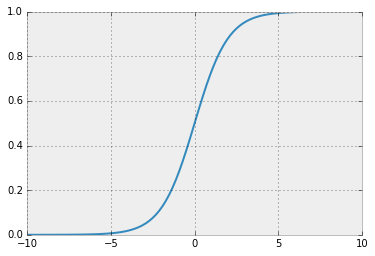

In [14]:
def sigmoid(a):  return 1 / (1 + np.exp(-a));

xvals = np.linspace(-10,10,100);
plt.plot(xvals, sigmoid(xvals));

### Sigmoid and Logit Functions

Its inverse is the **logit function** or the log-odds ratio,
    $$
    a = \ln \left( \frac{\sigma}{1-\sigma} \right)
    $$

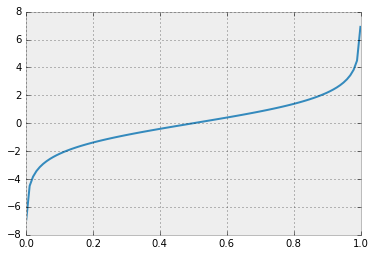

In [15]:
def logit(sigma): return np.log(sigma / (1-sigma));

xvals = np.linspace(0.001, 0.999, 100);
plt.plot(xvals, logit(xvals));

### Sigmoid and Logit Functions

The sigmoid function generalizes to the **normalized exponential** or **softmax** function:

$$
p_k = \frac{\exp(q_k)}{\sum_j \exp(q_j)}
$$

### Logistic Regression

- Simpest discriminative model that is **linear** in the parameters.
- Models the **class posterior** using a sigmoid applied to a linear function of the feature vector:
    $$
    \begin{align}
    y &\sim \mathrm{Bernoulli}[ \sigma(w^T \phi(x)) ] \\
    P(y | \phi(x) ) &= y(\phi(x)) = \sigma(w^T \phi(x))
    \end{align}
    $$
- We can solve the paramter $w$ by maximizing the likelihood of the training data.

### Logistic Regression:  Why Sigmoid?

- For two classes, **Bayes' theorem** says:
    $$ p(C_1|x) = \frac {p(x|C_1) \cdot p(C_1)} {p(x|C_1) \cdot p(C_1) + p(x|C_2) \cdot p(C_2)} $$   
- The **log odds** is defined to be:
    $$ a = ln \frac{p(C_1|x)}{p(C_2|x)} = ln \frac{p(x|C_1) \cdot p(C_1)}{p(x|C_2) \cdot p(C_2)} $$   
- In terms of the log odds, the posterior is defined as:
    $$ p(C_1|x) = \frac {1} {1+ exp(-a)} = \sigma(a) $$

### Logistic Regression:  Intuition

- Given data $x$ and learned weights $w$, pick the label with the largest **posterior probability**
    $$
    \begin{align}
    P(t = 1 | x,w) &= \sigma(w^T \phi(x)) \\
    P(t = 0 | x,w) &= 1 - \sigma(w^T \phi(x))
    \end{align}
    $$
- This is equivalent to setting a threshold at $p = 0.5$.
    - Classify $x$ as positive ($y=1$) if $\sigma(w^T \phi(x)) > 0.5$
    - This creates a **linear decision boundary** in the feature space!  (for $\phi(x) \in \R^d$)

### Logistic Regression:  Intuition

- Classify $x$ as positive if $\sigma(w^T \phi(x)) > 0.5$.
    $$
    \begin{gather}
    \sigma(w^T \phi(x))
    = \frac{\exp(w^T \phi(x))}{1 + \exp(w^T \phi(x))} > 0.5 \\
    \implies \boxed{w^T \phi(x) > 0}
    \end{gather}
    $$

- This is the equation for a half-plane in $\R^d$, with **normal vector** $w$!

### Logistic Regression:  Linear Decision

In [16]:
# source code for plot on NEXT SLIDE!
def plot_linear_boundary():
    # random data + normal
    x = np.random.randn(2,50);
    w = np.random.randn(2);
    # classify based on w
    labels = np.dot(w.T, x) > 0;
    blue, red = x[:,labels==0], x[:,labels==1];

    # grid over plot window
    xx = np.linspace( min(x[0])-1, max(x[0])+1, 100);
    yy = np.linspace( min(x[1])-1, max(x[1])+1, 100);
    X,Y = np.meshgrid(xx, yy);

    # compute w.T*x for each point on grid
    Z = np.array([X.ravel(), Y.ravel()]);
    Z = np.dot(w.T, Z).reshape(X.shape) < 0;

    plt.contourf(X, Y, Z, cmap="RdBu", alpha=0.5);
    plt.plot(blue[0], blue[1], 'ob', red[0], red[1], 'or');

### Logistic Regression:  Linear Decision

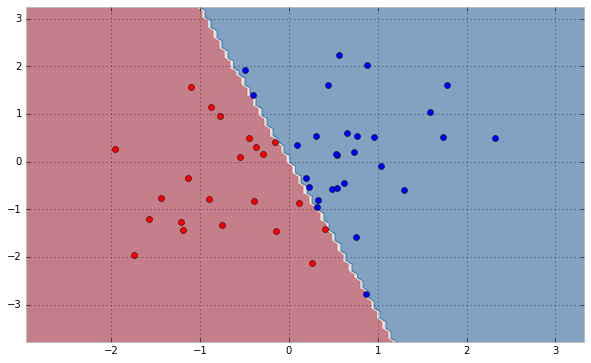

In [17]:
plt.figure(figsize=(10,6))
plot_linear_boundary();

### Logistic Regression:  Likelihood

- We saw before that the **likelihood** for each binary label is:
    $$
    \begin{align}
    P(t = 1 | x,w) &= \sigma(w^T \phi(x)) \\
    P(t = 0 | x,w) &= 1 - \sigma(w^T \phi(x))
    \end{align}
    $$
- With a clever trick, this
    $$
    P(t | x,w) = \sigma(w^T \phi(x))^t \cdot (1 - \sigma(w^T \phi(x)))^{1-t}
    $$

### Logistic Regression

- For a data set $\{ (\phi(x_n), t_n) \}$ where $t_n \in \{ 0,1 \}$, the **likelihood function** is
    $$
    P(t | w) = \prod_{n=1}^N y_n^{t_n} (1-y_n) ^{1-t_n}
    $$
    - where $y_n = P(C_1 | \phi(x_n)) = \sigma(w^T \phi(x_n))$
- Minimize the **loss** or **negative log-likelihood**, $E(w) = -\ln P(t|w)$
    - maximizes the likelihood

### Derivation:  $\nabla_w \ln P(t | w)$

$ = \sum_{n=1} \nabla_w \left[ 
        t_n \ln \sigma(w^T \phi(x_n)) + (1-t_n) \ln(1 - \sigma(w^T \phi(x_n))
  \right]
$

$ = \sum_{n=1}^N \left( 
        t_n       \frac{y_n (1-y_n )}{y_n} - (1-t_n) \frac{y_n (1-y_n )}{1-y_n }
    \right) \nabla_w\left[ w^T \phi(x_n) \right]
$

$
= \sum_{n=1}^N \left( 
    t_n(1-y_n ) - (1-t_n) y_n 
    \right) \nabla_w\left[ w^T \phi(x_n) \right]
$

$
= \sum_{n=1}^N (t_n - y_n ) \phi(x_n)
= \sum_{n=1}^N \left[ t_n - \sigma(w^T \phi(x_n)) \right] \phi(x_n)
$

### Logistic Regression:  Gradient Descent

We have just shown that the gradient of the loss is
    $$
    \begin{gather}
    \nabla_w E(w) = \sum_{n=1}^N (y_n - t_n) \phi(x_n) \\
    y_n = P(C_1 | \phi(x_n)) = \sigma(w^T \phi(x_n))
    \end{gather}
    $$

- This resembles the gradient expression from linear regression with least squares!
    $$
    \begin{align}
    \text{Linear} \quad & y_n - t_n = \sigma(w^T \phi(x_n)) - t_n \\
    \text{Logistic} \quad & y_n - t_n = w^T \phi(x_n) - t_n
    \end{align}
    $$

### Newton's Method:  Overview

- **Goal:**  Minimize a general function $F(w)$ in one dimension by solving for
    $$
    f(w) = \frac{\partial F}{\partial w} = 0
    $$
- **Newton's Method:** To find roots of $f$, Repeat until convergence:
    $$
    w \leftarrow w - \frac{f(w)}{f'(w)}
    $$

### Newton's Method:  Geometric Intuition

- Find the roots of $f(w)$ by following its **tangent lines**.  The tangent line to $f$ at $w_{k-1}$ has equation
    $$
    \ell(w) = f(w_{k-1}) + (w-w_{k-1}) f'(w_{k-1})
    $$
- Set next iterate $w_{k+1}$ to be **root** of tangent line:
    $$
    \begin{gather}
    f(w_{k-1}) + (w-w_{k-1}) f'(w_{k-1}) = 0 \\
    \implies \boxed{ w = w_{k-1} - \frac{f(w_{k-1})}{f'(w_{k-1})} }
    \end{gather}
    $$

### Newton's Method:  Geometric Intuition

<img src="images/newton.jpg">

Newton's Method did not converge.
Newton's Method: 6.01837360219


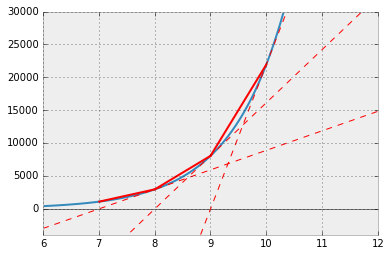

In [18]:
# custom newton's method -- see Canvas
from newton_plot import *;

def fn(x): return np.exp(x) - x**2;
def d1(x): return np.exp(x) - 2*x;
def d2(x): return np.exp(x) - 2;

lst = [];
print("Newton's Method:", newton_exact(d1, d2, 10, lst=lst, maxn=4));
plot_optimization(plt.gca(), fn, d1, lst, xlim=(6,12), ylim=(-4000, 30000), tangents=True);

Newton's Method did not converge.
Newton's Method: -0.0625


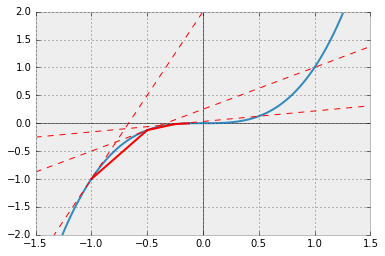

In [19]:
# custom newton's method -- see Canvas
from newton_plot import *;

def fn(x): return x**3;
def d1(x): return 3 * x**2;
def d2(x): return 6 * x;

lst = [];
print("Newton's Method:", newton_exact(d1, d2, -1, lst=lst, maxn=4));
plot_optimization(plt.gca(), fn, d1, lst, xlim=(-1.5,1.5), ylim=(-2,2), tangents=True);

### Newton's Method:  Recap

To minimize $F(w)$, find roots of $F'(w)$ via Newton's Method.

**Repeat until convergence**:
$$
\boxed{w \leftarrow w - \frac{F'(w)}{F''(w)}}
$$

### Newton's Method:  Multivariate Case

Replace second derivative with the **Hessian Matrix**,
    $$
    H_{ij}(w) = \frac{\partial^2 F}{\partial w_i \partial w_j}
    $$

Newton update becomes:
$$
\boxed{ w \leftarrow w - H^{-1} \nabla_w F}
$$

### Recall:  Linear Regression

- For linear regression, least squares has a **closed-form solution**:
    $$
    w_{ML} = (\Phi^T \Phi)^{-1} \Phi^T t
    $$
- This generalizes to weighted least squares, with diagonal weight matrix $R$,
    $$
    w_{WLS} = (\Phi^T R \Phi)^{-1} \Phi^T R t
    $$

### Logistic Regression:  Newton's Method

- For logistic regression, however, $\nabla_w E(w) = 0$ is **nonlinear**, and no closed-form solution exists.  

### We must iterate!

- Newton's method is a good choice in many cases.

### Iterative Solution

- Apply Newton's method to solve $\nabla_w E(w) = 0$
- This involves least squares with weights $R_{nn} = y_n (1-y_n) $
- Since $R$ depends on $w$, and vice-versa, we get...

**Iteratively-Reweighted Least Squares (IRLS)**
<div style="border: 1px solid black; display: block; padding: 15px; margin: 10px 0">
Repeat Until Convergence:
<br>
1. $w^{(new)} = w_{WLS} = (\Phi^T R \Phi)^{-1} \Phi^T R z$
<br>
2. $z = \Phi w^{(old)} - R^{-1} (y - t)$
</div>
    

<span style="color: red; font-size: 36px; line-height: 36px;">Hi, Jake!  I think this is a good place to stop the lecture...  the rest was directly copied from Honglak and really benefit from some improvement.</span>

# Gaussian Discriminant Analysis

### Gaussian Discriminant Analysis

- **Generative** probabilistic classifier, model $P(Y,X) = P(X \mid Y) P(Y)$
- Viewed as a Bayesian model, we have
    - **Prior** $ p(y=C_k) $: Constant (eg. Bernoulli)
    - **Likelihood** $ p(x| y=C_k) $: Gaussian distribution
    
    $$
    p (x| y=C_k) = \frac{1}{(2\pi) ^\frac{D}{2} |\Sigma|^ \frac{1}{2}} exp \left\{- \frac {1}{2} (x - \mu_k)^T \Sigma^{-1} (x - \mu_k) \right\}
    $$
    

### Gaussian Discriminant Analysis

Use Bayes' Rule as before for classification.  For any class $i$,

$$
p(C_i|x) = \frac {p(x|C_i) \cdot p(C_i)} {\Sigma_k p(x|C_k) \cdot p(C_k)}
$$

In [20]:
# Credits: Scikit-learn example on Linear and Quadratic Discriminant Analysis with confidence ellipsoid


# colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


###############################################################################
# generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


###############################################################################
# plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '.', color='#990000')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '.', color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10)
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10)

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')

###############################################################################

### GDA Example

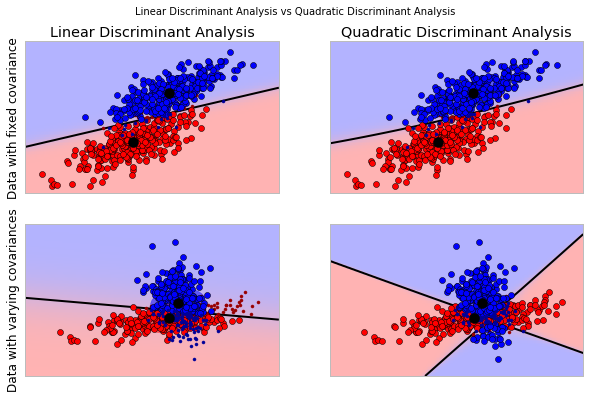

In [21]:
plt.figure(figsize=(10,6))

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariances=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis')
plt.show()

## Class Conditional Densities

Suppose we model $ p(x |C_k) $ as Gaussians with the _same_ _covariance_ matrix:

$ p (x| C_k) = \frac{1}{(2\pi) ^\frac{D}{2} |\Sigma|^ \frac{1}{2}} exp \left\{- \frac {1}{2} (x - \mu_k)^T \Sigma^{-1} (x - \mu_k) \right\} $

This gives us $ p(C_1|x) = \sigma(w^T x + w_0) $

where $ w = \Sigma^{-1}(\mu_1 - \mu_2) $ 

and $ w_0 = -\frac{1}{2} \mu_1^T \Sigma ^{-1} \mu_1 + \frac{1}{2} \mu_2^T \Sigma ^{-1} \mu_2 + ln \frac {p(C_1)}{p(C_2)} $

## Derivation

$$
\begin{align}
P (x, C_1) 
&= P(x|C_1) \cdot P(C_1) \\
&= \frac{1}{(2\pi) ^\frac{D}{2} |\Sigma|^ \frac{1}{2}} exp \left\{- \frac {1}{2} (x - \mu_1)^T \Sigma^{-1} (x - \mu_1) \right\} \cdot P(C_1)
\end{align}
$$


$$
\begin{align}
P (x, C_2) 
&= P(x|C_2) \cdot P(C_2) \\
&=  \frac{1}{(2\pi) ^\frac{D}{2} |\Sigma|^ \frac{1}{2}} exp \left\{- \frac {1}{2} (x - \mu_2)^T \Sigma^{-1} (x - \mu_2) \right\} \cdot P(C_2)
\end{align}
$$

__"Log Odds"__
$$
\begin{align}
log \frac {p(C_1|x)}{p(C_2|x)} 
&= log \frac {p(C_1|x)}{1 - p(C_1|x)} \\
&= log \frac{exp \left\{- \frac {1}{2} (x - \mu_1)^T \Sigma^{-1} (x - \mu_1) \right\}}{exp \left\{- \frac {1}{2} (x - \mu_2)^T \Sigma^{-1} (x - \mu_2) \right\}} + log \frac{P(C_1)}{P(C_2)} \\
&= \left\{- \frac {1}{2} (x - \mu_1)^T \Sigma^{-1} (x - \mu_1) \right\} - \left\{- \frac {1}{2} (x - \mu_2)^T \Sigma^{-1} (x - \mu_2) \right\} +  log \frac{P(C_1)}{P(C_2)} \\
&= (\mu_1 - \mu_2)^T \Sigma^{-1} x - \frac{1}{2} \mu_1\Sigma^{-1}\mu_1 + \frac{1}{2} \mu_2\Sigma^{-1}\mu_2 + log \frac{P(C_1)}{P(C_2)} \\
&= (\Sigma^{-1}(\mu_1 - \mu_2))^T x + w_0
\end{align}
$$

where $ w_0 = -\frac{1}{2} \mu_1^T \Sigma ^{-1} \mu_1 + \frac{1}{2} \mu_2^T \Sigma ^{-1} \mu_2 + log \frac {p(C_1)}{p(C_2)}$

## Class-Conditional Densities 
## (for shared covariances)

* $ P(C_k|x) $ is a sigmoid function: $ \sigma(a) = \frac {1}{1+exp(-a)} $

- with logg-odds (_logit function_):
$ a = log(\frac{\sigma}{1-\sigma} = (\Sigma^{-1}(\mu_1 - \mu_2))^T x + w_0 $

where $ w_0 = -\frac{1}{2} \mu_1^T \Sigma ^{-1} \mu_1 + \frac{1}{2} \mu_2^T \Sigma ^{-1} \mu_2 + log \frac {p(C_1)}{p(C_2)} $

* Generalizes to normalized exponential or _softmax_: $ p_i = \frac{exp(q_i)}{\Sigma_j exp(q_j)}$

## Linear Decision Boundaries

* With the same covariance matrices, the boundary $ p(C_1|x) = p(C_2|x)$ is linear.
    - Different priors $p(C_1), P(C_2)$ just shift it around.
    
<img src="linear_db.png" width=750px, align="middle">

## Learning parameters via maximum likelihood

* Given training data $\{(x^{(1)}, t^{(1)}), .... , (x^{(N)}, t^{(N)})\}$ and a generative model (_shared covariance_)

$$ p(t) = \phi^t (1-\phi)^{(1-t)} $$

$$ p(x|t=0) = \frac{1}{\sqrt{2\pi} |\Sigma|^\frac{1}{2}} exp (- \frac {1}{2} (x - \mu_0)^T \Sigma^{-1} (x - \mu_0) ) $$

$$ p(x|t=1) = \frac{1}{\sqrt{2\pi} |\Sigma|^\frac{1}{2}} exp (- \frac {1}{2} (x - \mu_1)^T \Sigma^{-1} (x - \mu_1) ) $$



__log likelihood__

$$
\begin{align}
log (L)  
&= \prod_{i=1}^{N} P(X^{(i)}, t^{(i)}) \\
&= \sum_{i=1}^{N} log P(X^{(i)}, t^{(i)})
\end{align}
$$

## Learning via maximum likelihood

Maximum likelihood estimation solutions

$$ \phi = \frac{1}{N} \sum_{i=1}^{N} 1\{t_i =1\} $$

$$ \mu_0 = \frac{\sum_{i=1}^{N} 1\{t_i = 0\} x_i}{\sum_{i=1}^{N} 1\{t_i = 0\}}  $$


$$ \mu_1 = \frac{\sum_{i=1}^{N} 1\{t_i = 1\} x_i}{\sum_{i=1}^{N} 1\{t_i = 1\}}  $$

$$ \Sigma = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu_{t_i})(x_i - \mu_{t_i})^T $$

## The case of Different Covariances

* Decision boundaries can be quadratic.

<img src="cov.png" width=750px, align="middle">

## GDA v. Logistic Regression

* For an M-dimensional feature space, 
    - Logistic regression has to fit M parameters.
    - GDA has to fit 
        * 2M parameters for means of $ p(x|C_1)$ and $ p(x|C_2)$
        * M(M+1)/2 parameters for the shared covariance matrix.




* Logistic regression has less parameters and is more flexible about data distribution.


* GDA has a stronger modeling assumption, and works well when the distribution follows the assumption.